# 1. 赛题分析
比赛要求参赛选手根据给定的数据集，建立模型，预测房屋租金。  
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。  
这是典型的回归预测。  
  
## 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　
　　　　


## 导入必要工具包

In [1]:
#coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

## 读取数据

In [2]:
data_train = pd.read_csv('./data/train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('./data/test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)

In [3]:
# 显示前5行
data_train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,Train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,Train


## 数据总体信息

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 52 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [5]:
data_train.shape

(41440, 52)

一、 训练样本数N：41440

二、特征维数：52

包含了类别型特征和数值型特征， 其中pv和uv有缺失值。
最后一维Type是自己添加的。

没有标签Y，所以是回归问题。


In [7]:
# 对数值型特征，得到每个特征的描述统计量
data_train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值。
可初步了解各特征的分布，数值型特征有40个。

## 数据探索

对单个变量，可以用直方图、箱体图等方式查看其大致分布，是否存在噪声数据点。

## 缺失值分析

In [11]:
data_train.isnull().sum()

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [12]:
def missing_values(df):
    data = pd.DataFrame(df.isnull().sum(), columns={"missingNum"})
    data['sum'] = len(df)
    data['normal'] = len(df)-data['missingNum']
    data['ratio'] = data['missingNum']/data['sum'] * 100
    data['dtype'] = df.dtypes

    data = data[data["missingNum"]>0].reset_index().sort_values(by=["missingNum", "index"], ascending=[False, True])
    data.set_index('index', inplace=True)
    return data

missing_values(data_train)

,missingNum,sum,normal,ratio,dtype
index,,,,,
pv,18,41440,41422,0.043436,float64
uv,18,41440,41422,0.043436,float64


### 数值型特征

In [9]:
# 数值型特征如下
numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum','busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum','totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum','supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']

### 直方图

用seaborn的displot方法可以对数值型特征绘制直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D83CE6400>,
      dtype=object)

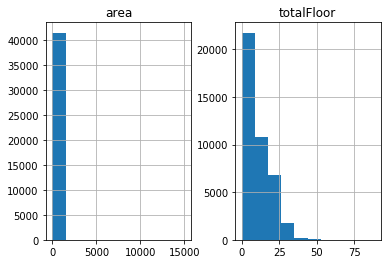

In [45]:
# 使用DataFrame的hist()方法可以绘制直方图，纵轴是样本数目
features = ['area', 'totalFloor']
data_train[features].hist()

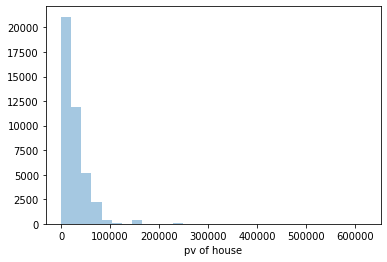

In [47]:
sns.distplot(data_train['pv'], bins=30, kde=False)
plt.xlabel("pv of house")
plt.show()

特征的分布是长尾分布，和指数分布比较接近。可以考虑对该特征进行log(x+1)变换。

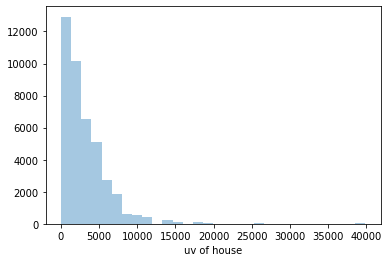

In [48]:
sns.distplot(data_train['uv'], bins=30, kde=False)
plt.xlabel("uv of house")
plt.show()

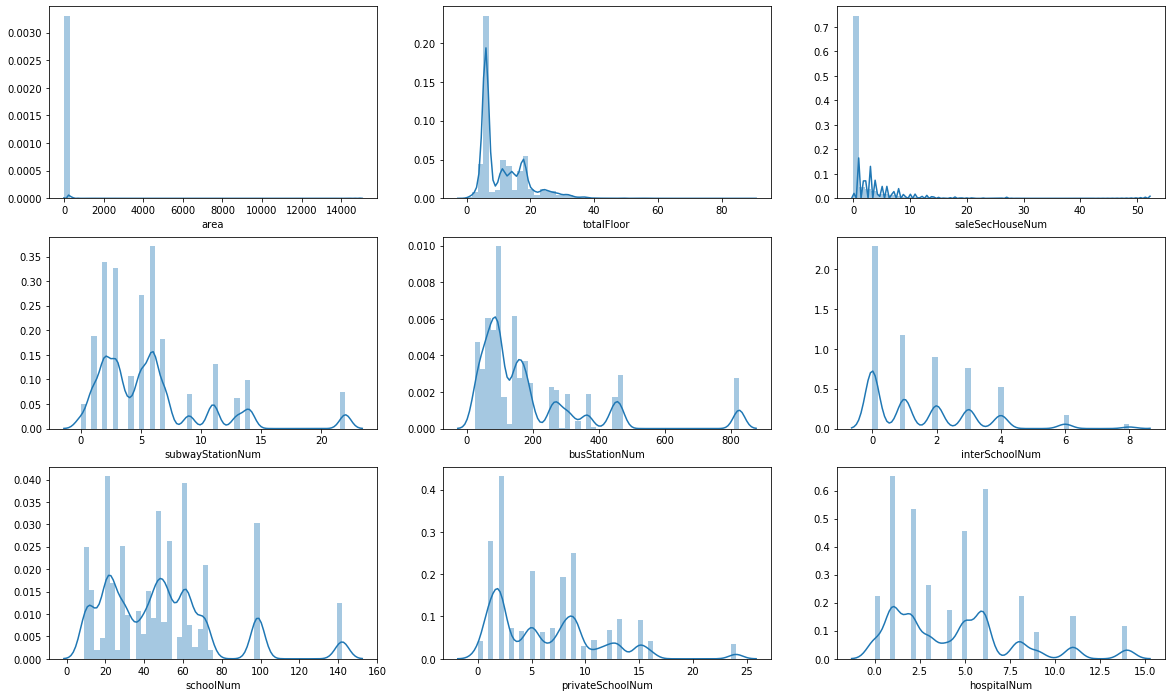

In [13]:
fig, axes = plt.subplots(3,3, figsize=(20,10))
fig.set_size_inches(20,12)
sns.distplot(data_train['area'], ax=axes[0][0])
sns.distplot(data_train['totalFloor'], ax=axes[0][1])
sns.distplot(data_train['saleSecHouseNum'], ax=axes[0][2])
sns.distplot(data_train['subwayStationNum'], ax=axes[1][0])
sns.distplot(data_train['busStationNum'], ax=axes[1][1])
sns.distplot(data_train['interSchoolNum'], ax=axes[1][2])
sns.distplot(data_train['schoolNum'], ax=axes[2][0])
sns.distplot(data_train['privateSchoolNum'], ax=axes[2][1])
sns.distplot(data_train['hospitalNum'], ax=axes[2][2])

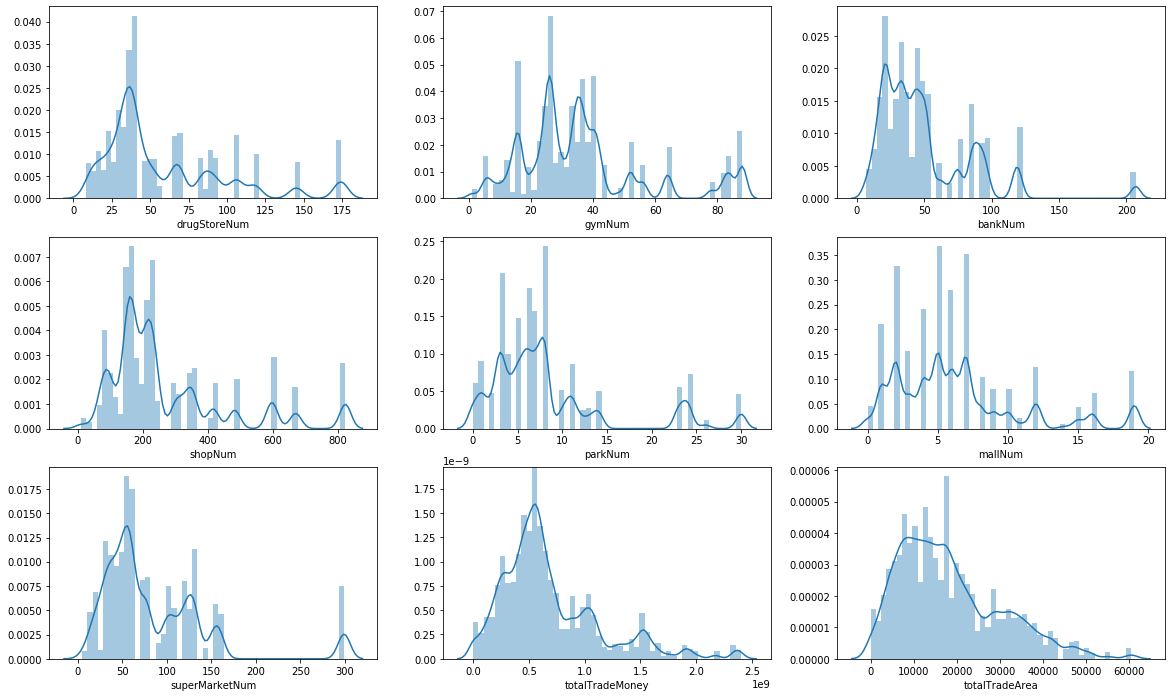

In [14]:
fig, axes = plt.subplots(3,3, figsize=(20,10))
fig.set_size_inches(20,12)
sns.distplot(data_train['drugStoreNum'], ax=axes[0][0])
sns.distplot(data_train['gymNum'], ax=axes[0][1])
sns.distplot(data_train['bankNum'], ax=axes[0][2])
sns.distplot(data_train['shopNum'], ax=axes[1][0])
sns.distplot(data_train['parkNum'], ax=axes[1][1])
sns.distplot(data_train['mallNum'], ax=axes[1][2])
sns.distplot(data_train['superMarketNum'], ax=axes[2][0])
sns.distplot(data_train['totalTradeMoney'], ax=axes[2][1])
sns.distplot(data_train['totalTradeArea'], ax=axes[2][2])

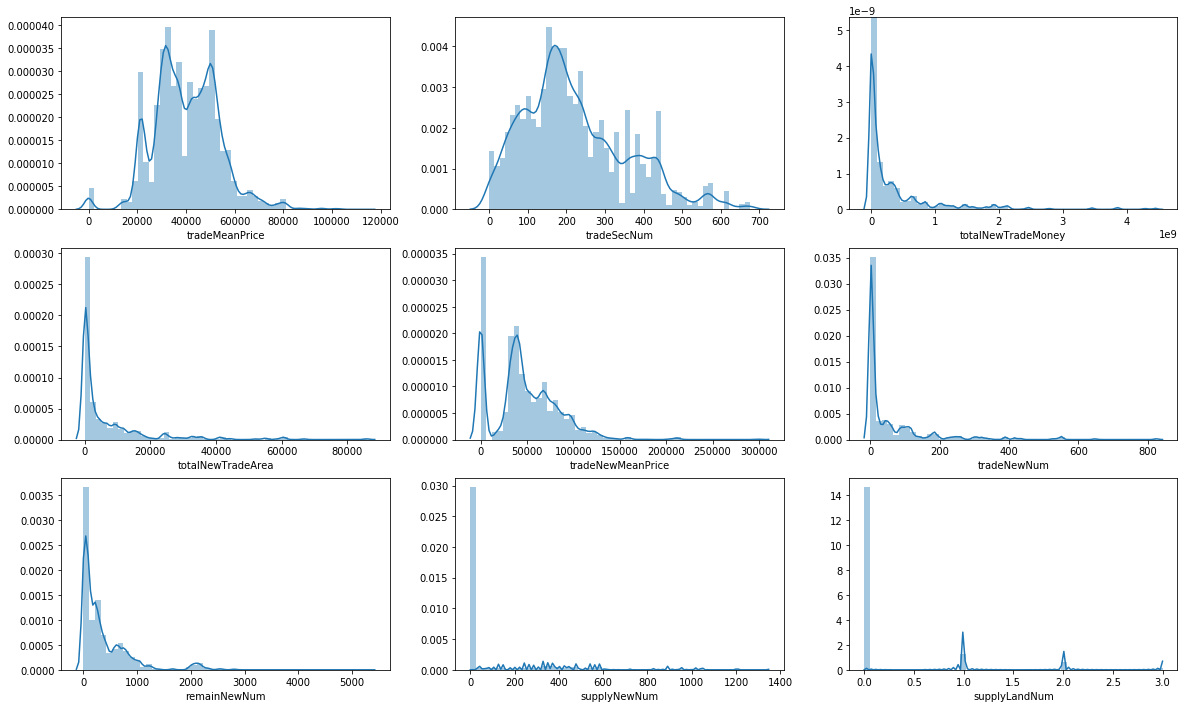

In [15]:
fig, axes = plt.subplots(3,3, figsize=(20,10))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMeanPrice'], ax=axes[0][0])
sns.distplot(data_train['tradeSecNum'], ax=axes[0][1])
sns.distplot(data_train['totalNewTradeMoney'], ax=axes[0][2])
sns.distplot(data_train['totalNewTradeArea'], ax=axes[1][0])
sns.distplot(data_train['tradeNewMeanPrice'], ax=axes[1][1])
sns.distplot(data_train['tradeNewNum'], ax=axes[1][2])
sns.distplot(data_train['remainNewNum'], ax=axes[2][0])
sns.distplot(data_train['supplyNewNum'], ax=axes[2][1])
sns.distplot(data_train['supplyLandNum'], ax=axes[2][2])

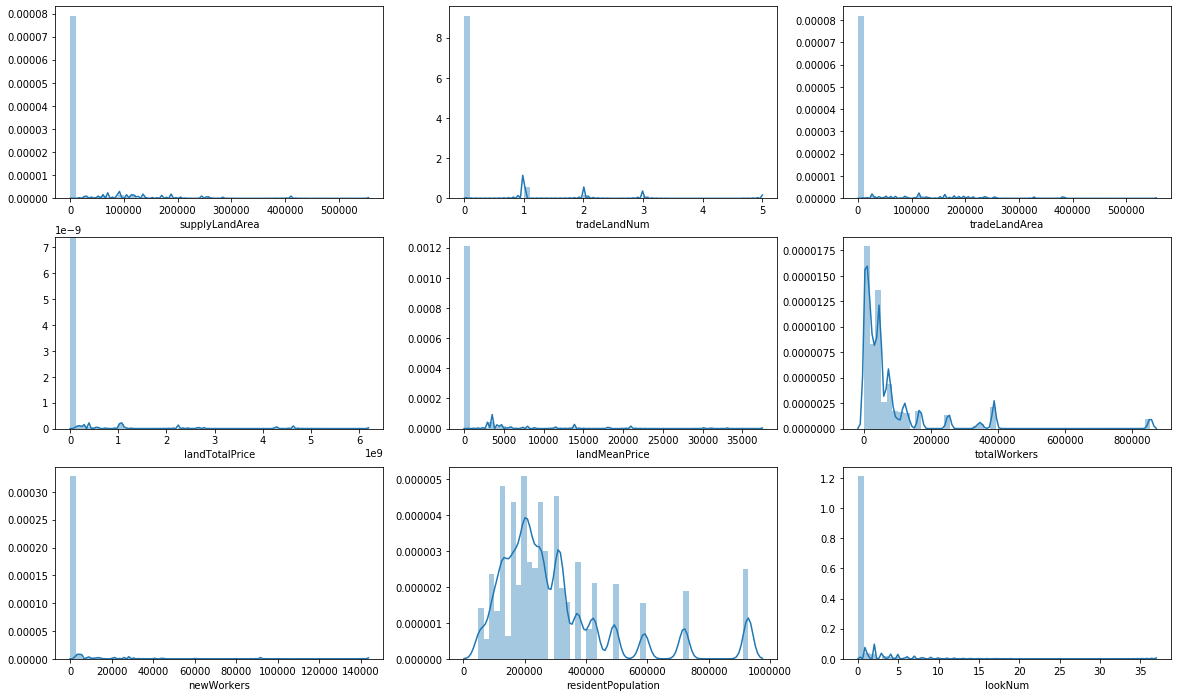

In [16]:
fig, axes = plt.subplots(3,3, figsize=(20,10))
fig.set_size_inches(20,12)
sns.distplot(data_train['supplyLandArea'], ax=axes[0][0])
sns.distplot(data_train['tradeLandNum'], ax=axes[0][1])
sns.distplot(data_train['tradeLandArea'], ax=axes[0][2])
sns.distplot(data_train['landTotalPrice'], ax=axes[1][0])
sns.distplot(data_train['landMeanPrice'], ax=axes[1][1])
sns.distplot(data_train['totalWorkers'], ax=axes[1][2])
sns.distplot(data_train['newWorkers'], ax=axes[2][0])
sns.distplot(data_train['residentPopulation'], ax=axes[2][1])
sns.distplot(data_train['lookNum'], ax=axes[2][2])

### 类别型特征

对离散型特征，可以使用频率表value_counts()给出每个特征取值的样本数目。或者采用countplot方法绘制直方图。

In [19]:
# 类别型特征如下
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']


Text(0, 0.5, 'number of occurrences')

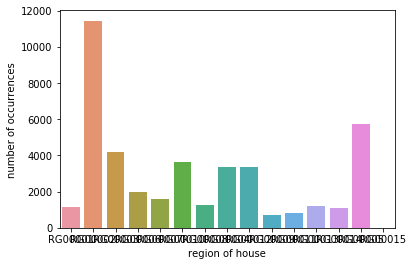

In [20]:
sns.countplot(data_train['region'])
plt.xlabel("region of house")
plt.ylabel("number of occurrences")

Text(0, 0.5, 'number of occurrences')

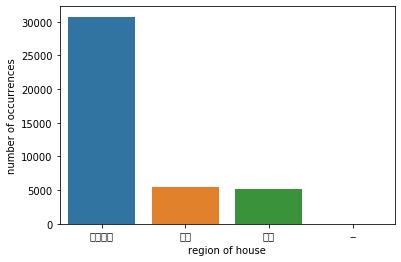

In [21]:
sns.countplot(data_train['rentType'])
plt.xlabel("region of house")
plt.ylabel("number of occurrences")

### 特征nunique分布

In [22]:
# 特征nunique分布, 默认情况下value_vounts()由高到低排列
for feature in categorical_feas:
    num_values = len(data_train[feature].unique())
    print("\n%s的特征有%d个不同取值，各取值及其出现的次数如下：" % (feature, num_values))
    print(data_train[feature].value_counts())


rentType的特征有4个不同取值，各取值及其出现的次数如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64

houseType的特征有104个不同取值，各取值及其出现的次数如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
          ... 
7室3厅4卫       1
2室1厅3卫       1
8室2厅3卫       1
7室1厅7卫       1
0室0厅1卫       1
Name: houseType, Length: 104, dtype: int64

houseFloor的特征有3个不同取值，各取值及其出现的次数如下：
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64

region的特征有15个不同取值，各取值及其出现的次数如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64

plate的特征有66个不同取值，各取值及其出现的次数如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, 

从结果看，特征communityName取值比较多，有4236个，后续做特征工程时会做一些处理。其他特征取值都不是很多。
特征houseType从常理推断应该不多，但数据统计显示有104个不同取值，同样后续会做处理

### 单调特征列分析

In [23]:
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    if cnt / data_train.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


### 统计特征值频次大于100的特征

In [24]:
# 统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
12  RG00011     793
13  RG00009     681
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7 

## Label分布

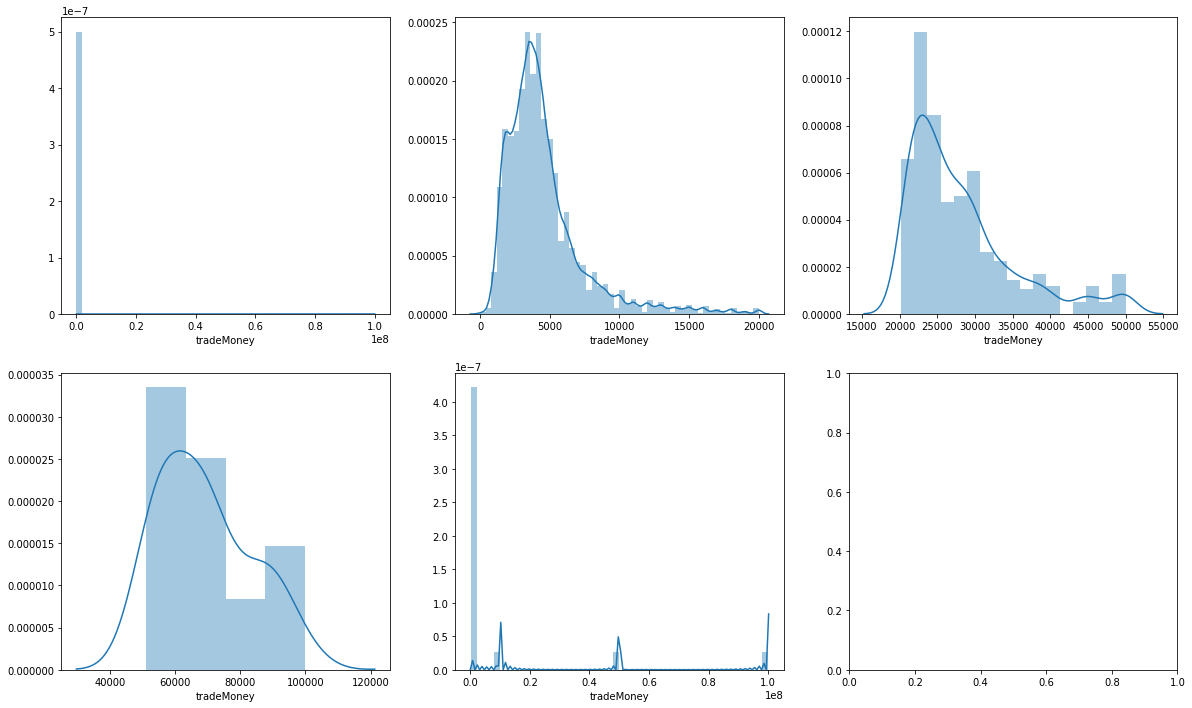

In [25]:
# Labe 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [26]:
print("money<=10000        ",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000  ",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000  ",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000 ",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000>money        ",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000         38964
10000<money<=20000   1985
20000<money<=50000   433
50000<money<=100000  39
100000>money         19


从Label分布结果看到，主要结果集中在20000之下。